<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>



http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
<hr>
    
Tf-IDF (p1): http://blog.christianperone.com/2011/09/machine-learning-text-feature-extraction-tf-idf-part-i/
    
Tf-IDF (p2): http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/
    
Glove: http://www.thushv.com/natural_language_processing/glove-global-vectors-for-word-representation/
    
Word2vec: http://www.thushv.com/natural_language_processing/word2vec-part-1-nlp-with-deep-learning-with-tensorflow-skip-gram/
    
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Result of ML <h1>
</div>

In [51]:
df_re = pd.DataFrame(result)
df_re.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
1,XGBRegressor,0.197106,0.688814
3,GaussianNB,0.637847,0.639337
4,DecisionTreeClassifier,0.661941,0.663390
2,KNeighborsClassifier,0.678386,0.688814
5,LinearSVC,0.699079,0.700033
0,ExtraTreesClassifier,0.710477,0.712398


In [52]:
df_re.to_csv('result_of_Basic_NLP007.csv',index=False)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Load data <h1>
</div>

In [2]:
import numpy as np
import pandas as pd
import re

In [10]:
#data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
data_path = "/Users/apple/Documents/Programming/python/Project/data/tweets/Third__CLean_training.1600000.process.csv"
df_data = pd.read_csv(data_path)
df_data = df_data.dropna().reset_index()

#df_data['Price_label(0,1)'] = df_data['Price_label(0,1)'].apply(xx)
df_data['text'] = df_data['text'].apply(lambda x: re.sub('-PRON- ','',x))
df_data['text'] = df_data['text'].apply(lambda x: re.sub('-PRON-','',x))
#df_data = df_data.reindex()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530184 entries, 0 to 1530183
Data columns (total 4 columns):
index         1530184 non-null int64
created_at    1530184 non-null object
text          1530184 non-null object
label         1530184 non-null int64
dtypes: int64(2), object(2)
memory usage: 46.7+ MB


In [11]:
def labelx(x):
    if x==4:
        return 1
    else:
        return 0
df_data['label'] = df_data['label'].apply(labelx)

In [12]:
df_data.head(5)

,index,created_at,text,label
0,0,Mon Apr 06 22:19:49 PDT 2009,upset not updat facebook text might cri result...,0
1,1,Mon Apr 06 22:19:53 PDT 2009,dive mani time ball manag save rest go bound,0
2,2,Mon Apr 06 22:19:57 PDT 2009,whole bodi feel itchi like fire,0
3,3,Mon Apr 06 22:19:57 PDT 2009,not behav mad whi becaus not see,0
4,4,Mon Apr 06 22:20:00 PDT 2009,not whole crew,0


In [13]:
df_data.groupby('label').sum()

,index
label,
0,309002753189
1,909366717500


In [ ]:
print

In [6]:
result = {}
result['title'] = []
result['cross_validation_train'] = []
result['accuracy_test'] = []

def result_maker(title,scoe,acc):
    result['title'].append(title)
    result['cross_validation_train'].append(scoe.mean())
    result['accuracy_test'].append(acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Embedding <h1>
</div>

## **Cut data, becuse I don't have space:**

In [ ]:
# 1530184 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_data,_, y_data,_ = train_test_split(df_data['text'],df_data['label'] ,test_size=0.50, random_state =32, shuffle=True)

In [17]:
from farhad.TextAwsome import Text_Embadding

In [18]:
glove_model = Text_Embadding(x_data)   # df_data.clean_text or df_data.text
glove_model.Glove_datastories_twitter_50d()
data_ET50d = glove_model.data2vec()  

Found 658125 word vectors.
Lenght of data: 765092
lenght of features: 50


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> model_selection <h1>
</div>

In [21]:
x = data_ET50d 
#y = [i for i in df_data['label']]
y = [i for i in y_data]

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.50, random_state =32, shuffle=True)

print("lenght train sample: ", len(x_train))
print("lenght train sample: ", len(x_test))
print('y_train sample:',y_train[1:10])
print('x_train sample: \n',x_train[0])

lenght train sample:  382546
lenght train sample:  382546
y_train sample: [0, 0, 1, 0, 1, 1, 1, 1, 0]
x_train sample: 
 [-0.03859538  0.05202736  0.04124341  0.0734569  -0.00229776 -0.02837828
 -0.073019   -0.01279442  0.00284792  0.0267969   0.90694547  0.04432925
  0.0032675  -0.01562735  0.04690408 -0.04051898  0.13491042  0.03199145
 -0.07730589 -0.1010235  -0.09243413  0.03431433 -0.0627295  -0.00391254
  0.0253977  -0.02755132 -0.03654208  0.03347418 -0.03484362  0.00411261
  0.04094996  0.03095596 -0.04368424 -0.02871248 -0.12219357  0.07223292
 -0.03418995  0.09788002 -0.00947645  0.12253967  0.04824568  0.17092124
 -0.01483751  0.07557782 -0.00414311  0.01508231 -0.05965708 -0.00513222
  0.02888768  0.07337037]


In [46]:
round(sum(y_train)*100.0/len(y_train))

50

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LogisticRegression <h1>
</div>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals import joblib

accuracy: 0.6997043648151985
accuracy: 0.6987684495665557


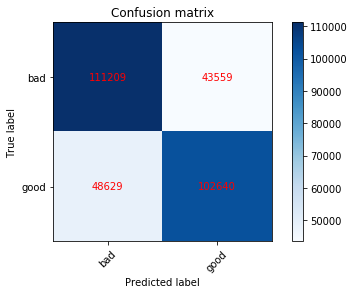

In [16]:
classifier = LogisticRegression(solver='sag')

scoe = cross_val_score(classifier,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [17]:
title = 'LogisticRegression'
result_maker(title,scoe,acc)

In [ ]:
filename = ''
joblib.sump(,filename)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ExtraTreesClassifier <h1>
</div>

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

accuracy: 0.7104766589264856
accuracy: 0.7123979861245445


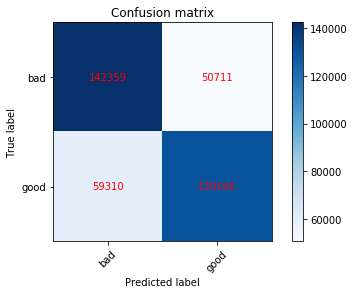

In [28]:
ETC = ExtraTreesClassifier(n_estimators=200)

scoe = cross_val_score(ETC,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


ETC.fit(x_train, y_train)
y_pred = ETC.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])


In [29]:
filename = 'bigtweets_basicNLP0070_ExtraTreesClassifier.sav'
joblib.dump(ETC,filename)
# loaded_model = joblib.load(filename)

['bigtweets_basicNLP0070_ExtraTreesClassifier.sav']

In [30]:
title = 'ExtraTreesClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> XGBRegressor <h1>
</div>

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.19710602263470853
accuracy: 0.6888138942767668


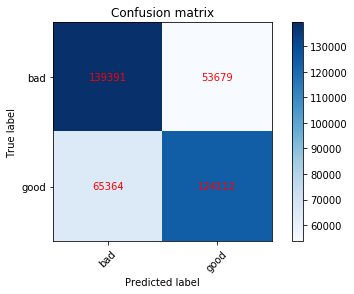

In [32]:
from xgboost import XGBRegressor

model_xgb_Regressor = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

scoe = cross_val_score(model_xgb_Regressor,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_xgb_Regressor.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [34]:
title = 'XGBRegressor'
result_maker(title,scoe,acc)

In [33]:
filename = ''
joblib.sump(,filename)

SyntaxError: invalid syntax (<ipython-input-33-b2146320aec3>, line 2)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> KNeighborsClassifier <h1>
</div>

accuracy: 0.6783864048954755
accuracy: 0.6888138942767668


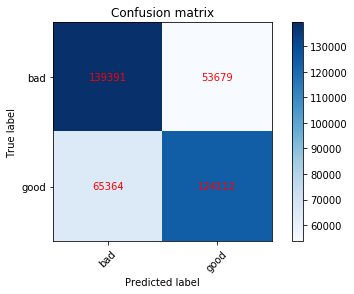

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kmean = KNeighborsClassifier()
scoe = cross_val_score(kmean, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

kmean.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [36]:
title = 'KNeighborsClassifier'
result_maker(title,scoe,acc)

In [37]:
filename = 'bigtweets_basicNLP0070_KNeighborsClassifier.sav'
joblib.dump(model_xgb_Regressor,filename)

['bigtweets_basicNLP0070_KNeighborsClassifier.sav']

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> GaussianNB <h1>
</div>

accuracy: 0.6378474524209015
accuracy: 0.639337491438938


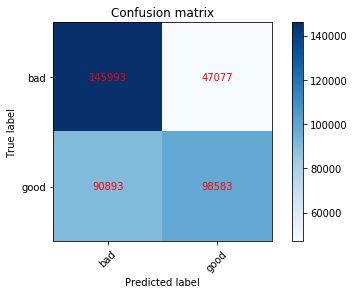

In [41]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
scoe = cross_val_score(GNB, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [42]:
title = ' GaussianNB'
result_maker(title,scoe,acc)

In [ ]:
filename = ''
joblib.sump(,filename)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> DecisionTreeClassifier <h1>
</div>

accuracy: 0.661941311232283
accuracy: 0.6633895008704835


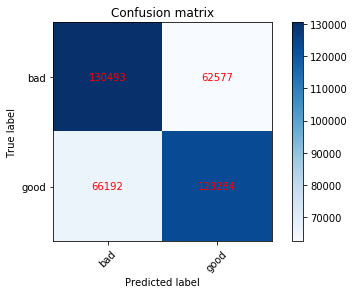

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
scoe = cross_val_score(model_DecisionTree, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_DecisionTree.fit(x_train, y_train)
y_pred = model_DecisionTree.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [44]:
title = 'DecisionTreeClassifier'
result_maker(title,scoe,acc)

In [ ]:
filename = ''
joblib.sump(,filename)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LinearSVC <h1>
</div>

accuracy: 0.6990793300758066
accuracy: 0.7000334600283364


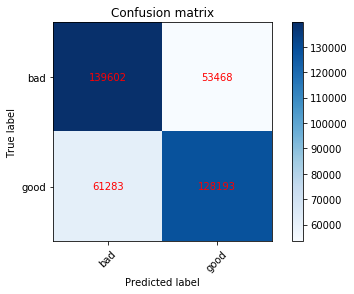

In [47]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

scoe = cross_val_score(LSVC, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [48]:
title = ' LinearSVC'
result_maker(title,scoe,acc)

In [50]:
filename = 'bigtweets_basicNLP0070_LinearSVC.sav'
joblib.dump(LSVC,filename)

['bigtweets_basicNLP0070_LinearSVC.sav']